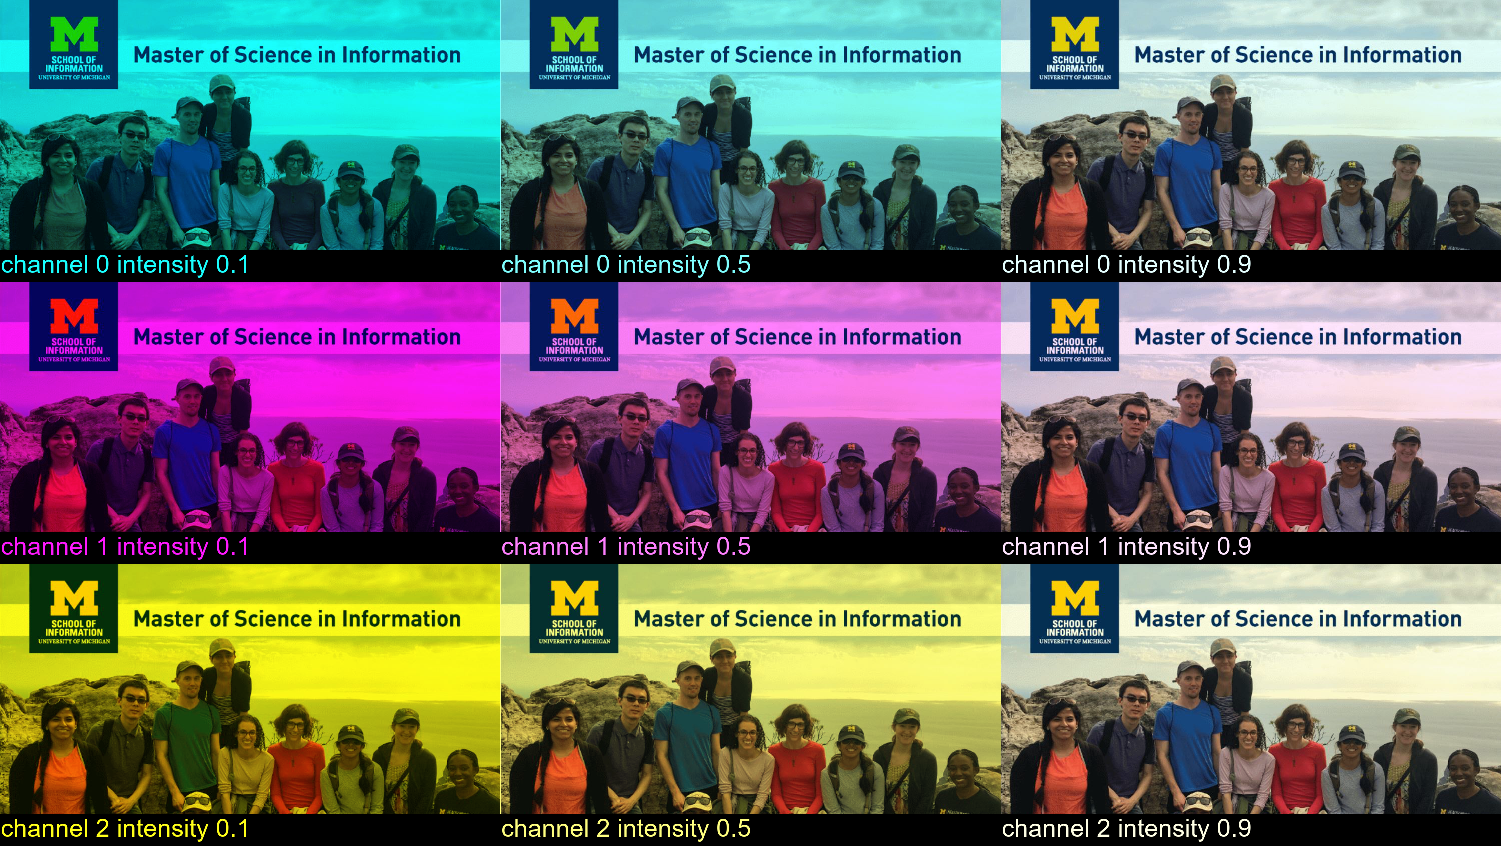

In [79]:
import PIL
from PIL import Image
from PIL import ImageFont
from PIL import ImageEnhance
from PIL import ImageDraw



image=Image.open("my_img.JPG")
image=image.convert('RGB')

font_ = ImageFont.truetype(r"C:\Users\System-Pc\Desktop\arial.ttf",50)
images = []
for fact in [0.1,0.5,0.9] :
    my_image = image.copy()
    t1 = 'channel 0 intensity ' + str(fact)
    draw = ImageDraw.Draw(my_image)
    draw.rectangle([0,500,1001,564],fill='black')
    draw.text((2,500),t1,font=font_, align ="left")
    pix = my_image.load()
    for i_width in range(image.width):
        for i_height in range(image.height): 
            pix[i_width,i_height] =(int(fact*pix[i_width,i_height][0]),pix[i_width,i_height][1],pix[i_width,i_height][2])    
    
    images.append(my_image)
 
    
    my_image = image.copy()
    t1 = 'channel 1 intensity ' + str(fact)
    draw = ImageDraw.Draw(my_image)
    draw.rectangle([0,500,1001,564],fill='black')
    draw.text((2,500),t1,font=font_, align ="left")
    pix = my_image.load()
    for i_width in range(image.width):
        for i_height in range(image.height): 
            pix[i_width,i_height]=(pix[i_width,i_height][0],int(fact*pix[i_width,i_height][1]),pix[i_width,i_height][2])
    images.append(my_image)
    
    
    my_image = image.copy()
    t1 = 'channel 2 intensity ' + str(fact)
    draw = ImageDraw.Draw(my_image)
    draw.rectangle([0,500,1001,564],fill='black')
    draw.text((2,500),t1,font=font_, align ="left")    
    pix = my_image.load()
    for i_width in range(image.width):
        for i_height in range(image.height): 
            pix[i_width,i_height]=(pix[i_width,i_height][0],pix[i_width,i_height][1],int(fact*pix[i_width,i_height][2]))
 
    images.append(my_image)

first_image=images[0]
contact_sheet=PIL.Image.new(first_image.mode, (first_image.width*3,first_image.height*3))
y=0
x=0
for img in images:
    contact_sheet.paste(img, (x, y) )
    if y+first_image.height == contact_sheet.height:
        x=x+first_image.width
        y=0
    else:
        y=y+first_image.height        

contact_sheet = contact_sheet.resize((int(contact_sheet.width/2),int(contact_sheet.height/2) ))
display(contact_sheet)